# Text Clustering and Classification

In [2]:
from datasets import load_dataset

ds = load_dataset('billingsmoore/TED2020-bo-en', split='train')['target']

ds[0]

'My big idea is a very, very small idea that can unlock billions of big ideas that are at the moment dormant inside us.'

## Clustering

In [11]:
from easy_text_clustering.clusterer import ClusterClassifier
import pandas as pd

cc = ClusterClassifier(embed_device='cuda')
cc.fit(ds)


INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: all-MiniLM-L6-v2
/home/j/Documents/MLotsawa/.venv/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
INFO:root:Embedding texts...


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

INFO:root:Building FAISS index...
INFO:root:Projecting with umap...
INFO:root:Clustering...
INFO:root:Summarizing cluster centers...


Using HDBSCAN params={}
Request:
<s>[INST]Example 1:


Example 2:


Example 3:


Example 4:


Example 5:


Example 6:


Example 7:


Example 8:


Example 9:


Example 10:


Use three words total (comma separated)to describe general topics in above texts. Under no circumstances use enumeration. Example format: Tree, Cat, Fireman[/INST]
Number of clusters is 53


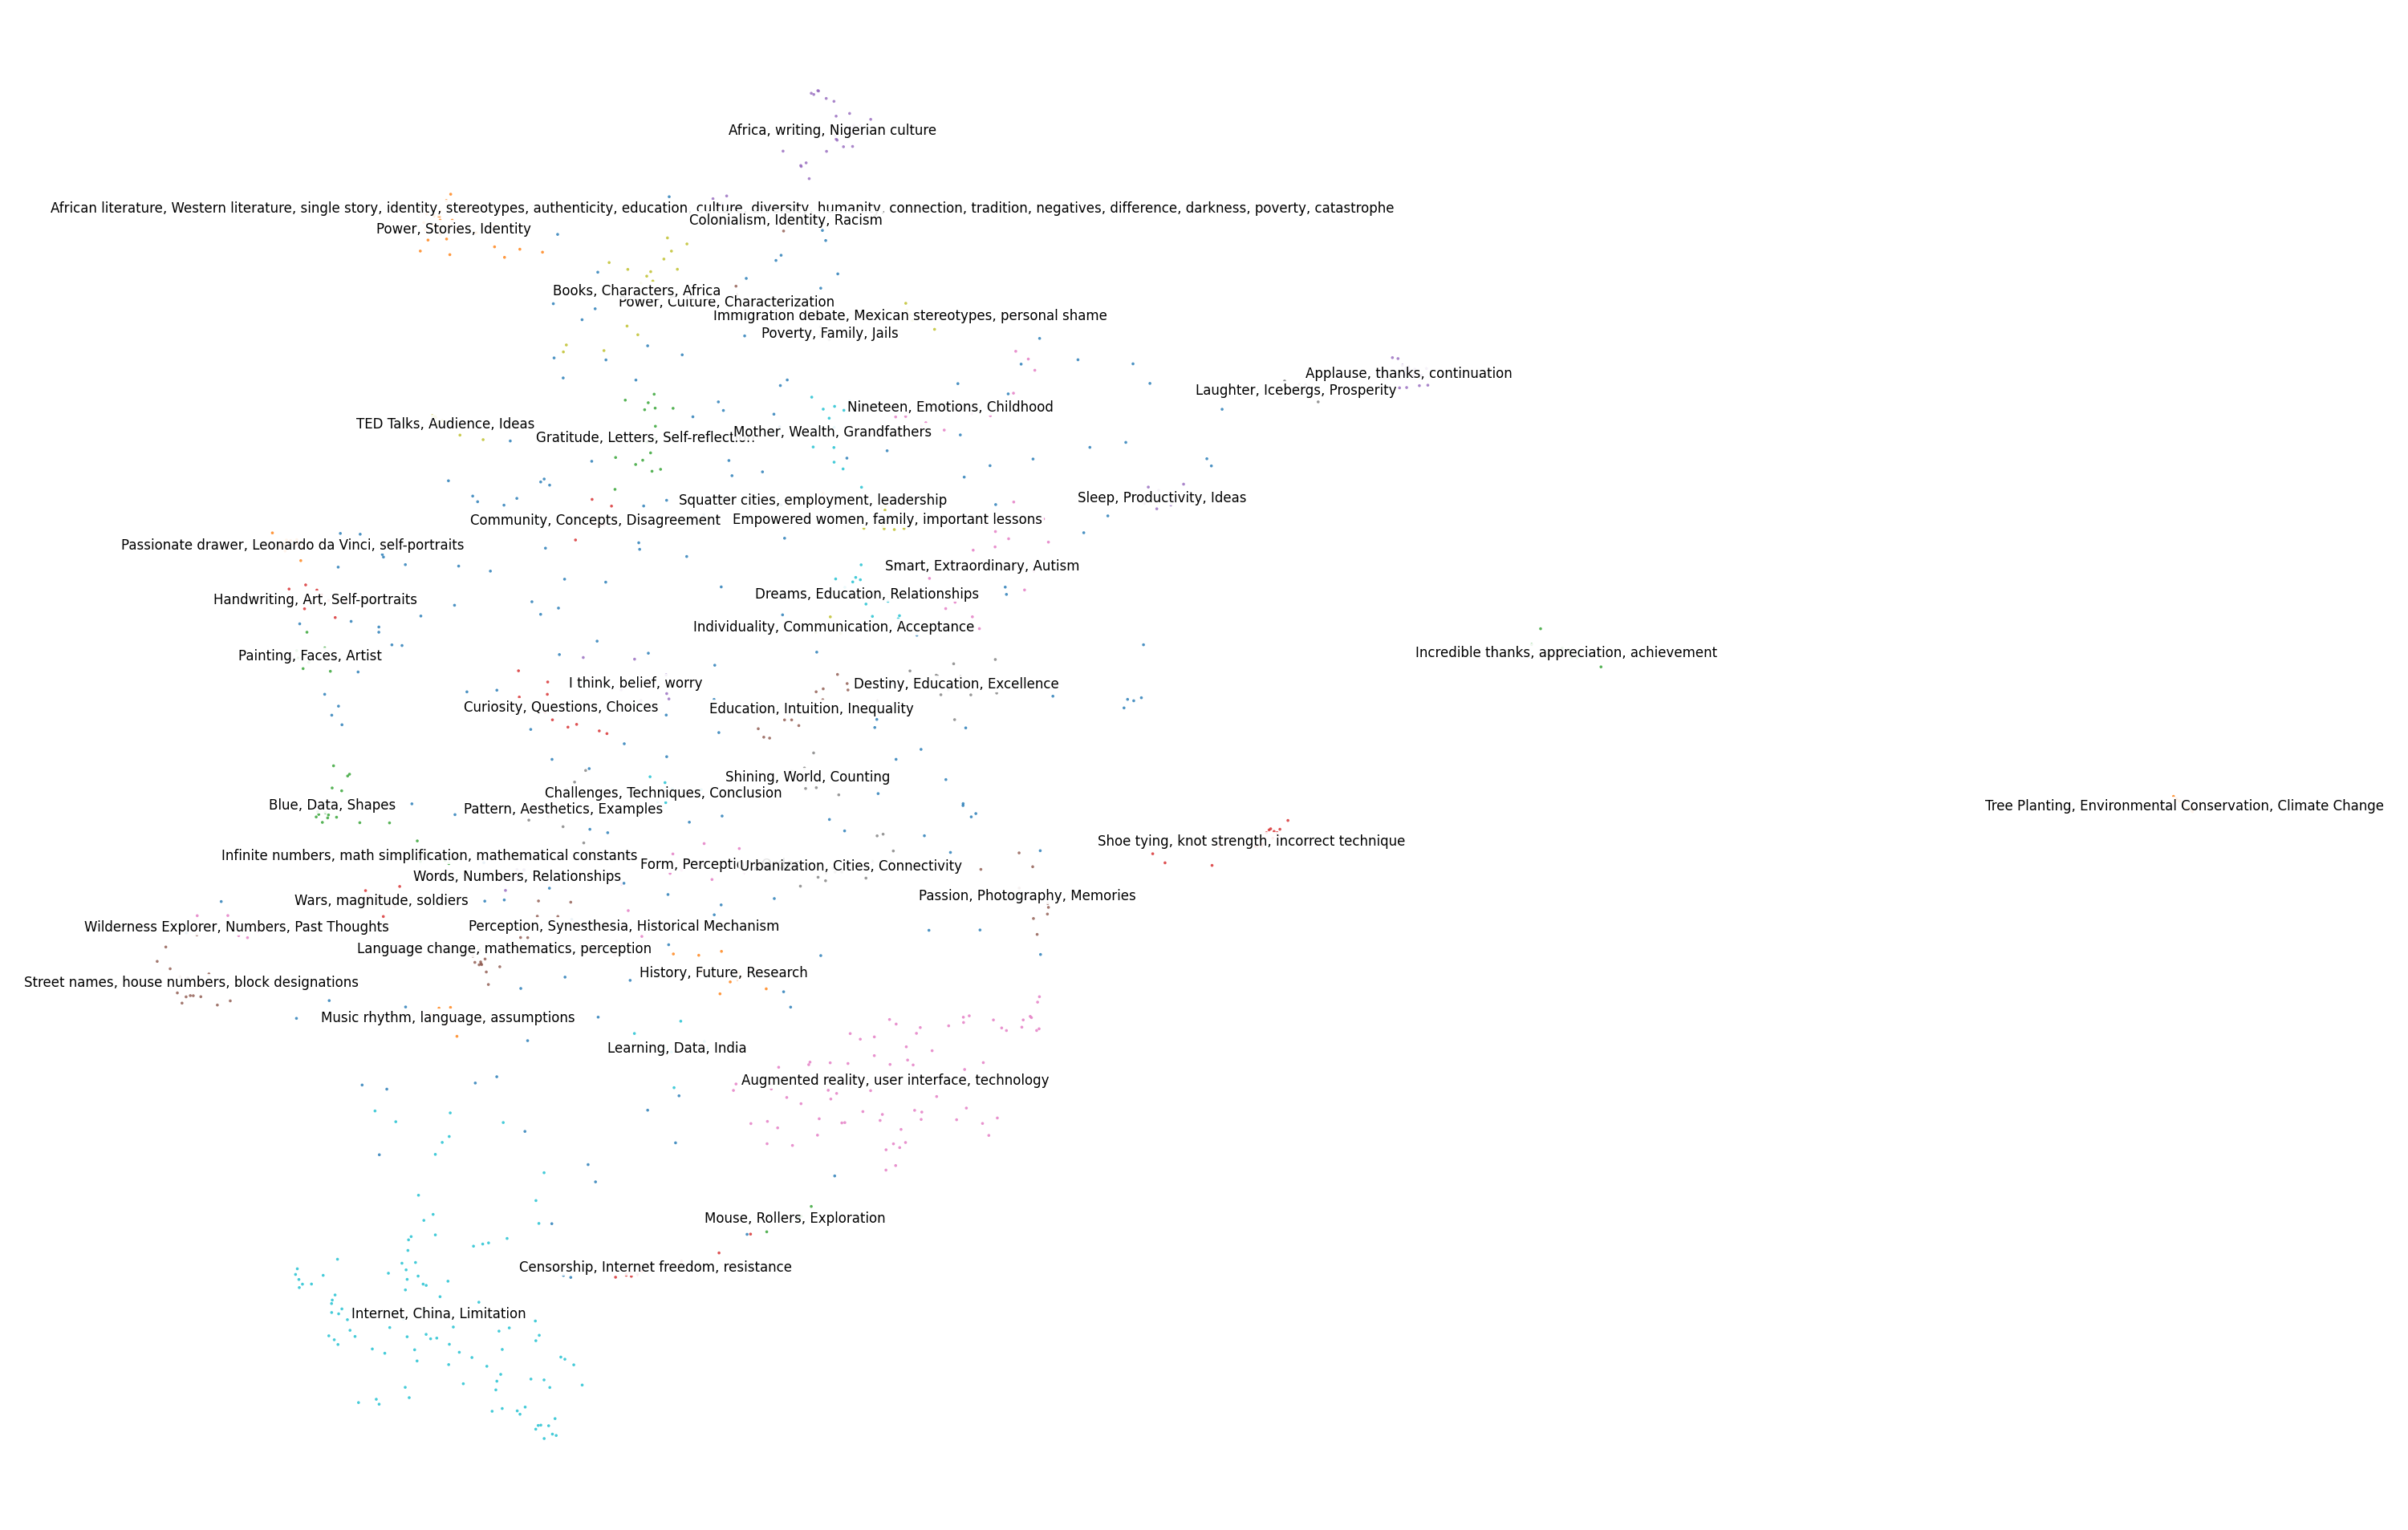

In [12]:
cc.show()

In [13]:
cc.cluster_summaries

{-1: 'None',
 0: 'Tree Planting, Environmental Conservation, Climate Change',
 1: 'Incredible thanks, appreciation, achievement',
 2: 'Shoe tying, knot strength, incorrect technique',
 3: 'Applause, thanks, continuation',
 4: 'Street names, house numbers, block designations',
 5: 'Wilderness Explorer, Numbers, Past Thoughts',
 6: 'Laughter, Icebergs, Prosperity',
 7: 'TED Talks, Audience, Ideas',
 8: 'Internet, China, Limitation',
 9: 'Power, Stories, Identity',
 10: 'Mouse, Rollers, Exploration',
 11: 'Censorship, Internet freedom, resistance',
 12: 'Sleep, Productivity, Ideas',
 13: 'Passion, Photography, Memories',
 14: 'Augmented reality, user interface, technology',
 15: 'Poverty, Family, Jails',
 16: 'Immigration debate, Mexican stereotypes, personal shame',
 17: 'Learning, Data, India',
 18: 'Passionate drawer, Leonardo da Vinci, self-portraits',
 19: 'Painting, Faces, Artist',
 20: 'Handwriting, Art, Self-portraits',
 21: 'Africa, writing, Nigerian culture',
 22: 'Power, Cultur

In [14]:
cc.cluster_labels

array([45, 12,  6, 12, 12, 23, 23, 23, 12, 12, 44, -1, 12, 28, -1, -1,  5,
       27, -1,  6, -1, -1, -1, 12,  1,  3,  0,  7, 39,  2,  6, -1, 23, -1,
        2,  2,  2,  2,  6,  2,  1,  3,  2,  2,  2, 39,  2,  2,  2,  2, -1,
       24,  3, -1,  2,  2, 40,  6,  3,  0, 41, -1, 41, 41, 33, -1, 32, -1,
       -1, -1, 50, -1, 25, -1, -1, 40, 46, 49, -1, 32, 51, -1, 48, 50, 37,
       -1, 47, 19, 37, 37, 37, 19, 19, 46, 37, 46, 46, 46, -1, 37, 48, 51,
       -1, 49, 48, 51, 36, 51, 38, 37, 37, 32, 37, 37, 13, 37, 46, 37, 37,
       46, 37, 26, -1, 36, 38, 51, -1,  0, 51, -1, 51, 51, 49, -1, -1, 48,
       40, -1, 36,  2,  2, -1, -1,  8, 32, -1, 48, 24, 42,  1,  3,  0, -1,
       33, 33, 24, 46, 24, 38, 33, 27, 27, 33, 33, -1, 33, -1, 33, 45, 27,
       47, -1, -1, 33, 24, 24,  1,  0, -1, 45, 50, 39, 51, 49, 49, 49,  6,
       49, -1, 49, 49,  5, 49,  5, 49, 49, 49, 49, 49, 47, 47, 47, 50, 50,
       -1, 49, 47, 47, 47, 47, 51, 49, -1, -1, 25, -1, -1, 45, -1, 45,  1,
        3,  0,  8,  8, -1

In [15]:
summaries = [cc.cluster_summaries[label] for label in cc.cluster_labels]

In [16]:
full_ds = load_dataset('billingsmoore/TED2020-bo-en', split='train')

In [ ]:
full_ds[0]

{'source': 'ངའི་བསམ་བློ་ཆེན་པོ་འདི་ནི། བསམ་བློ་ཧ་ཅང་ཆུང་ཆུང་ཞིག་ཡིན། བསམ་བློ་ཆུང་ཆུང་འདིས་ བསམ་བློ་ཆེན་པོ་ཐེར་འབུམ་མང་པོའི་སྒོ་འབྱེད་ཐུབ། བསམ་བློ་ཆེན་པོ་དེ་དག་ནི་ད་ལྟ་ང་ཚོའི་སེམས་སུ་བག་ལ་ཉལ་ནས་ཡོད།',
 'target': 'My big idea is a very, very small idea that can unlock billions of big ideas that are at the moment dormant inside us.'}

In [20]:
df = full_ds.to_pandas()
df.head()

,source,target
0,ངའི་བསམ་བློ་ཆེན་པོ་འདི་ནི། བསམ་བློ་ཧ་ཅང་ཆུང་ཆུ...,"My big idea is a very, very small idea that ca..."
1,དེ་ལྟར་བྱེད་ཐུབ་པའི་ངའི་བསམ་བློ་ཆུང་ཆུང་དེ་ནི་...,And my little idea that will do that is sleep.
2,(དགོད་སྒྲ།) (ཐལ་མོ་རྡེབ་སྒྲ།) ཁང་མིག་འདི་འི་ནང...,(Laughter) (Applause) This is a room of type A...
3,ཁང་མིག་འདིའི་ནང་ གཉིད་ཀྱིས་མ་འདང་བའི་བུད་མེད་ཀ...,This is a room of sleep-deprived women.
4,ངས་ཐབས་ལམ་ཁག་པོ་ཞིག་ལ་བསྟེན་ནས་ གཉིད་ཀྱི་རིན་ཐ...,And I learned the hard way the value of sleep.


In [21]:
df['topic'] = summaries

In [22]:
df.head()

,source,target,topic
0,ངའི་བསམ་བློ་ཆེན་པོ་འདི་ནི། བསམ་བློ་ཧ་ཅང་ཆུང་ཆུ...,"My big idea is a very, very small idea that ca...","History, Future, Research"
1,དེ་ལྟར་བྱེད་ཐུབ་པའི་ངའི་བསམ་བློ་ཆུང་ཆུང་དེ་ནི་...,And my little idea that will do that is sleep.,"Sleep, Productivity, Ideas"
2,(དགོད་སྒྲ།) (ཐལ་མོ་རྡེབ་སྒྲ།) ཁང་མིག་འདི་འི་ནང...,(Laughter) (Applause) This is a room of type A...,"Laughter, Icebergs, Prosperity"
3,ཁང་མིག་འདིའི་ནང་ གཉིད་ཀྱིས་མ་འདང་བའི་བུད་མེད་ཀ...,This is a room of sleep-deprived women.,"Sleep, Productivity, Ideas"
4,ངས་ཐབས་ལམ་ཁག་པོ་ཞིག་ལ་བསྟེན་ནས་ གཉིད་ཀྱི་རིན་ཐ...,And I learned the hard way the value of sleep.,"Sleep, Productivity, Ideas"


In [23]:
from datasets import Dataset

labeled_ds = Dataset.from_pandas(df)

In [24]:
labeled_ds[0]

{'source': 'ངའི་བསམ་བློ་ཆེན་པོ་འདི་ནི། བསམ་བློ་ཧ་ཅང་ཆུང་ཆུང་ཞིག་ཡིན། བསམ་བློ་ཆུང་ཆུང་འདིས་ བསམ་བློ་ཆེན་པོ་ཐེར་འབུམ་མང་པོའི་སྒོ་འབྱེད་ཐུབ། བསམ་བློ་ཆེན་པོ་དེ་དག་ནི་ད་ལྟ་ང་ཚོའི་སེམས་སུ་བག་ལ་ཉལ་ནས་ཡོད།',
 'target': 'My big idea is a very, very small idea that can unlock billions of big ideas that are at the moment dormant inside us.',
 'topic': 'History, Future, Research'}

In [25]:
labeled_ds.push_to_hub('billingsmoore/TED2020-bo-en')

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/billingsmoore/TED2020-bo-en/commit/52d0b2e9b6efc8e8fd3135588b43717a0fc413d2', commit_message='Upload dataset', commit_description='', oid='52d0b2e9b6efc8e8fd3135588b43717a0fc413d2', pr_url=None, pr_revision=None, pr_num=None)